In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Riscaldamento di una Stanza 

**Vogliamo riscaldare una stanza con un convettore**

* Il convettore riscalda l'aria, che sua volta riscalda i muri
* ...Che disperdono parte del calore verso l'esterno

Sappiamo che:

* La temperature del convettore e dell'esterno sono costanti
* L'aria della stanza ed i muri hanno capacità termiche non trascurabili

Possiamo modellare il sistema utilizzando un circuito RC equivalente:


<center>
<img src="assets/heating.png" width=50%/>
</center>


**Il sistema è definito dalle equazioni differenziali:**

\begin{align}
& \dot{T}_a = \frac{1}{C_a} (w_{ca} - w_{aw}) && \dot{T}_w = \frac{1}{C_w} (w_{aa} - w_{wo}) \\
\end{align}

Che può essere riscritta come:

$$
\left(\begin{array}{c}
\dot{T_a} \\
\dot{T_w}
\end{array}\right)
=
\left(\begin{array}{c}
\frac{1}{C_a} (w_{ca} - w_{aq}) \\
\frac{1}{C_w} (w_{aw} - w_{wo})
\end{array}\right)
$$

Dove:

\begin{align}
& w_{ca} = \frac{1}{R_{ca}} (T_c - T_a) \\
& w_{aw} = \frac{1}{R_{aw}} (T_a - T_w) \\
& w_{wo} = \frac{1}{R_{wo}} (T_w - T_o) \\
\end{align}

## Esercizio 1

**Nel modulo `sol.heating` definire la funzione**

```python
def dstate(X, t):
    # Parametri fissi
    g = 9.81
    vA = 62 # Volume dell'aria
    vW = 0.25 * 16 * 2.7 # Volume dei muri
    mA = 1.225 * vA / g # Massa dell'aria
    mW = 1050 * vW / g # Massa dei muri
    Ca = 1005 * mA # Capacita' termica dell'aria
    Cw = 1000 * mW # Capacita' termica dei muri
    Rca = 0.35 # Resisitivita' termica convettore-aria
    Raw = 0.5 # Resistivita' termica aria-muro
    Rwo = 3.0 # Resistivita' termica muro-esterno
    Tc = 23 # Temperatura del convettore
    To = 15 # Temperatura esterna
```

* La funzione deve calcolare l'espressione (vettoriale) che definisce l'ODE
* La funzione deve restituire un array `numpy` con le due componenti della derivata


**Nel modulo `sol.heating` si definisca quindi la funzione:**


```python
def simulate():
    X0 = [19.5, 19.5]
    t = np.linspace(0, 3600 * 2, 3600 * 2)
    ...
```

* La funzione deve risolvere un problema ai valori iniziali, con le temperature iniziali indicate
* Il metodo deve restituire
  - La matrice con gli stati visitati
  - Il vettore dei tempi visitati

Per verificare la correttezza dei risultati, può essere utile disegnare l'andamento dello stato usando la funzione `plot_state_evolution` nel modulo `base.util` incluso nel tema d'esame.

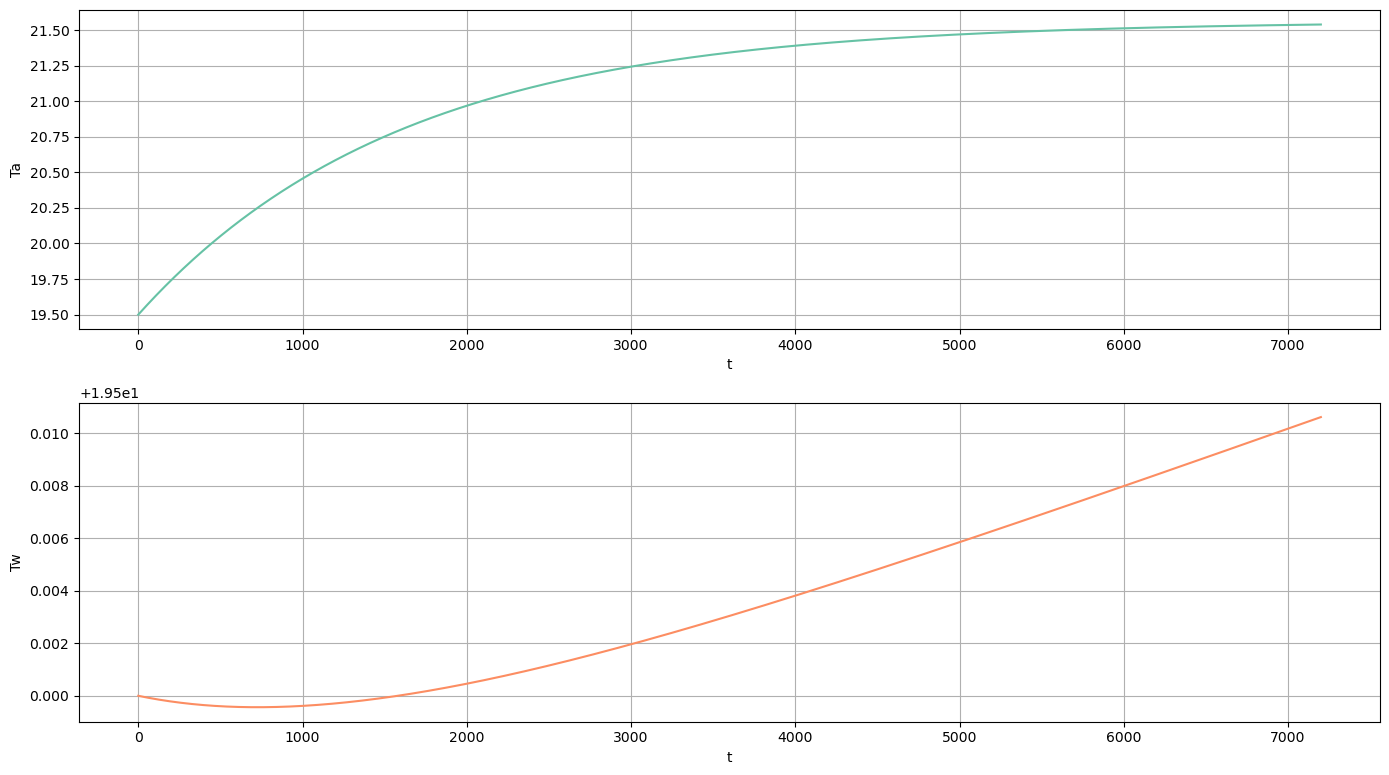

In [2]:
from base import util
from sol import heating

X, t = heating.simulate()
util.plot_state_evolution(X, t, ylabels=['Ta', 'Tw'], xlabel='t', figsize=(14, 8))

## Esercizio 2

Per definizione, all'equilibrio lo stato $x$ di un sistema non ha variazioni. Possiamo quindi determinare i punti di equilibrio richiedendo la condizione:

$$
\left(\begin{array}{c}
\dot{T_a} \\
\dot{T_w}
\end{array}\right)
=
\left(\begin{array}{c}
0\\
0
\end{array}\right)
$$

Dunque, l'equazione che caratterizza un equilibrio è:

$$
\left(\begin{array}{c}
\dot{T_a} \\
\dot{T_w}
\end{array}\right)
=
\left(\begin{array}{c}
\frac{1}{C_a} (w_{ca} - w_{aq}) \\
\frac{1}{C_w} (w_{aw} - w_{wo})
\end{array}\right)
=
\left(\begin{array}{c}
0\\
0
\end{array}\right)
$$

**Nel modulo `sol.heating` si definisca la funzione:**

```python
def find_equilibrium_aux(X):
    # Parametri fissi
    g = 9.81
    vA = 62 # Volume dell'aria
    vW = 0.25 * 16 * 2.7 # Volume dei muri
    mA = 1.225 * vA / g # Massa dell'aria
    mW = 1050 * vW / g # Massa dei muri
    Ca = 1005 * mA # Capacita' termica dell'aria
    Cw = 1000 * mW # Capacita' termica dei muri
    Rca = 0.35 # Resisitivita' termica convettore-aria
    Raw = 0.5 # Resistivita' termica aria-muro
    Rwo = 3.0 # Resistivita' termica muro-esterno
    Tc = 23 # Temperatura del convettore
    To = 15 # Temperatura esterna
    ...
```
* La funzione deve restituire i valori delle equazioni da azzerare

**Nel modulo `sol.heating` si definisca la funzione:**

```python
def find_equilibrium():
    x0 = [15,25] # Temperature iniziali
    ...
```

* La funzione deve utilizzare il metodo `scipy.optimize.fsolve` per determinare il punto di equilibrio a partire dalle temperature iniziali indicate
* La funzione deve restituire il valore del punto di equilibrio

In [3]:
Ta_eq, Tw_eq = heating.find_equilibrium()
print(f'Temperature di equilibrio: {Ta_eq, Tw_eq}')

Temperature di equilibrio: (22.272727272727273, 21.233766233766232)


## Esercizio 3

**Nel modulo `sol.heating` si definisca una funzione:**

```python
def temp_in_20min(X, t):
    ...
```

* Che restituisca in una tupla (nell'ordine) la temperatura raggiunta dell'aria e dei muri in 20 minuti.

Si stampino a video i valori.

In [4]:
Ta20, Tw20 = heating.temp_in_20min(X, t)
print(f'Ta in 20min: {Ta20}, Tw in 20min: {Tw20}')

Ta in 20min: 20.58534922734081, Tw in 20min: 19.499709736667555
